In [1]:
# Imports
import numpy
import matplotlib.pyplot as plt

import _plotting

In [2]:
# Helper functions

def construct_matrix_random(num_rows):
    """
    Two columns with values from 6*random.rand() - 3
    """
    matrix_out = numpy.random.rand(num_rows, 2)
    # 6*random.rand() - 3
    matrix_out[:,:] *= 6
    matrix_out[:,:] -= 3

    return matrix_out

## Building a linear dataset

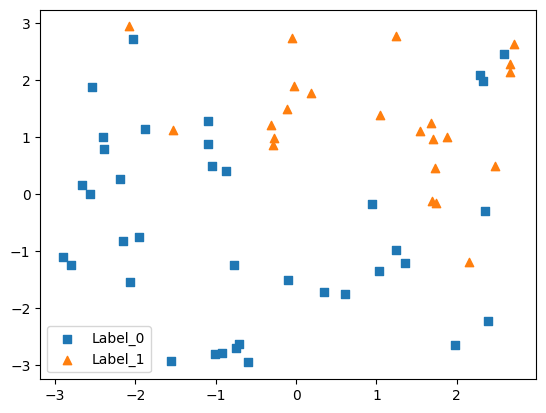

In [3]:
def construct_vector_labels_linear(matrix, num_rows_noise = 10):
    """
    Third column with x1+x2 > 0.5 and noise sampled from binomial
    """
    vector_noise = numpy.random.randint(low=0, high=1+1, size=num_rows_noise)
    # Vector of 0.5 < x1+x2
    vector_binary = (matrix.sum(axis=1) > 0.5)*1

    vector_out = numpy.append(vector_binary, vector_noise, axis = 0)

    return vector_out

num_rows = 50
num_rows_noise = 10
matrix_observed = construct_matrix_random(num_rows+num_rows_noise)
vector_labels = construct_vector_labels_linear(matrix_observed[0:num_rows], num_rows_noise)

matrix_linear = numpy.append(matrix_observed, vector_labels.reshape(-1,1), axis=1)

_plotting.plot_scatter(matrix_observed[vector_labels == 0, 0], matrix_observed[vector_labels == 0, 1], marker = 's')
_plotting.plot_scatter(matrix_observed[vector_labels == 1, 0], matrix_observed[vector_labels == 1, 1], marker = '^')
plt.legend(["Label_0", "Label_1"]) # not sure

## Building a circular dataset

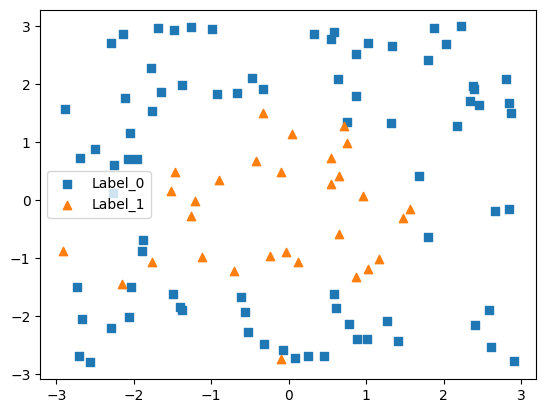

In [4]:
def construct_vector_labels_one_circle(matrix, num_rows_noise = 10):
    """
    Third column with x1^2 + x2^2 < 2.8 and noise sampled from binomial
    """
    vector_noise = numpy.random.randint(low=0, high=1+1, size=num_rows_noise)

    # Vector of x1^2 + x2^2 < 2.8
    vector_binary = (numpy.sum(numpy.square(matrix), axis=1) < 2.8)*1

    # add as a third column
    vector_out = numpy.append(vector_binary, vector_noise, axis = 0)

    return vector_out

num_rows = 100
num_rows_noise = 10
matrix_observed = construct_matrix_random(num_rows+num_rows_noise)
vector_labels = construct_vector_labels_one_circle(matrix_observed[0:num_rows], num_rows_noise)
_plotting.plot_scatter(matrix_observed[vector_labels == 0, 0], matrix_observed[vector_labels == 0, 1], marker = 's')
_plotting.plot_scatter(matrix_observed[vector_labels == 1, 0], matrix_observed[vector_labels == 1, 1], marker = '^')
plt.legend(["Label_0", "Label_1"]) # not sure
matrix_one_circle = numpy.append(matrix_observed, vector_labels.reshape(-1,1), axis=1)

## Building a two-circles dataset

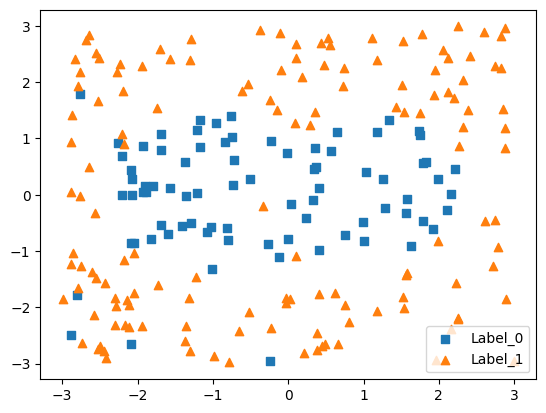

In [5]:
def construct_vector_labels_two_circle(matrix, num_rows_noise = 10):
    """
    Third column with (x1 +/- 1)^2 + x2^2 < 2 and noise sampled from Binomial
    """
    vector_noise = numpy.random.randint(low=0, high=1+1, size=num_rows_noise)

    # Vector of (x1 +/- 1)^2 + x2^2 < 2
    x2_squared = numpy.square(matrix[:, 1])
    mask_circle1 = ((matrix[:, 0]-1)**2 + x2_squared) < 2
    mask_circle2 = ((matrix[:, 0]+1)**2 + x2_squared) < 2
    vector_binary = (mask_circle1 | mask_circle2)

    # add as a third column
    vector_out = numpy.append(vector_binary, vector_noise, axis = 0)

    return vector_out

num_rows = 200
num_rows_noise = 20
matrix_observed = construct_matrix_random(num_rows+num_rows_noise)
vector_labels = construct_vector_labels_two_circle(matrix_observed[0:num_rows], num_rows_noise)
_plotting.plot_scatter(matrix_observed[vector_labels == 1, 0], matrix_observed[vector_labels == 1, 1], marker = 's')
_plotting.plot_scatter(matrix_observed[vector_labels == 0, 0], matrix_observed[vector_labels == 0, 1], marker = '^')
plt.legend(["Label_0", "Label_1"]) # not sure
matrix_two_circle = numpy.append(matrix_observed, vector_labels.reshape(-1,1), axis=1)